In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("new_data.csv", encoding="utf-8", sep=r',', skipinitialspace= True )

In [8]:
def yakıt_d(x):
    if x == "benzin":
        return float(1)
    elif x == "dizel":
        return float(1)
    elif x == "elektrik":
        return float(1)
    try:
        return float(1)
    except:
        return None

In [9]:
bmw_df = df.copy()
bmw_df["yakıt"] = bmw_df["yakıt"].apply(yakıt_d)

In [10]:
print(bmw_df["yakıt"])

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
Name: yakıt, dtype: float64


In [11]:
from sklearn import preprocessing
px = preprocessing.MinMaxScaler()
py = preprocessing.MinMaxScaler()

In [12]:
scaled_x = px.fit_transform(bmw_df.drop("fiyat", axis="columns"))
print(scaled_x)


[[0.57142857 0.2        0.70833333 0.38275862 0.        ]
 [0.64285714 0.2        0.70833333 0.1137931  0.        ]
 [0.64285714 0.2        0.70833333 0.49310345 0.        ]
 [0.42857143 1.         1.         0.86896552 0.        ]
 [0.71428571 0.2        0.70833333 0.24827586 0.        ]
 [0.64285714 1.         1.         0.55172414 0.        ]
 [0.5        0.2        0.         0.40344828 0.        ]
 [0.71428571 0.2        0.70833333 0.48965517 0.        ]
 [0.5        0.2        0.70833333 0.54137931 0.        ]
 [0.57142857 0.2        0.         0.57586207 0.        ]
 [0.5        1.         1.         0.52413793 0.        ]
 [0.78571429 0.6        0.29166667 0.4137931  0.        ]
 [0.64285714 0.2        0.         0.22413793 0.        ]
 [0.64285714 0.         0.         0.43103448 0.        ]
 [0.35714286 0.2        0.         0.5        0.        ]
 [0.28571429 1.         1.         1.         0.        ]
 [0.28571429 0.2        0.         0.54482759 0.        ]
 [0.5        0

In [13]:
scaled_y = py.fit_transform(bmw_df["fiyat"].values.reshape(bmw_df.shape[0],1))
print(scaled_y)

[[0.43131462]
 [0.53471196]
 [0.34564254]
 [0.183161  ]
 [0.44608567]
 [0.23042836]
 [0.24667651]
 [0.41654357]
 [0.2422452 ]
 [0.22008863]
 [0.24963072]
 [0.43870015]
 [0.31314623]
 [0.36779911]
 [0.07976366]
 [0.03249631]
 [0.02511078]
 [0.29985229]
 [0.26144756]
 [0.05908419]
 [0.0915805 ]
 [0.34268833]
 [0.        ]
 [0.49039882]
 [1.        ]
 [0.33530281]
 [0.37518464]
 [0.05169867]
 [0.28360414]
 [0.0620384 ]
 [0.04726736]
 [0.02363368]
 [0.02067947]
 [0.29837518]
 [0.25110783]
 [0.32053176]
 [0.49039882]
 [0.19054653]
 [0.46085672]
 [0.09896603]]


In [14]:
def BGD(x_train, y_true, epochs, learning_rate =0.01):
    number_of_features = x_train.shape[1] #5
    w = np.ones(number_of_features) #[1 1 1 1 1]
    b = 0
    n_samples = x_train.shape[0] # 40
    loss_list = []
    epoch_list = []
    for i in range(epochs):
        y_pred = np.dot(w, x_train.T) + b
        w_der = (len(w))*(1/n_samples)*(x_train.T.dot(y_pred - y_true)) # = -(len(w))*(1/n_samples)*(x_train.T.dot(y_true - y_pred))
        b_der = (1/n_samples)*np.sum(y_pred - y_true) # = np.mean(y_pred - y_true)
        
        w = w - learning_rate*w_der
        b = b - learning_rate*b_der

        loss = np.mean(np.square(y_true-y_pred))

        if i%10 == 0 :
            loss_list.append(loss)
            epoch_list.append(i)

    return w, b, loss, loss_list, epoch_list

In [15]:
w, b, loss, loss_list, epoch_list = BGD(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

In [16]:
print(f"w : {w},\n b : {b}, \n loss: {loss}")

w : [ 0.79099994 -0.04892368  0.09697857  0.04695228  1.        ],
 b : -0.18596155972294137, 
 loss: 0.007921937728683184


Text(0.5, 1.0, 'Epoch and Loss Comparison')

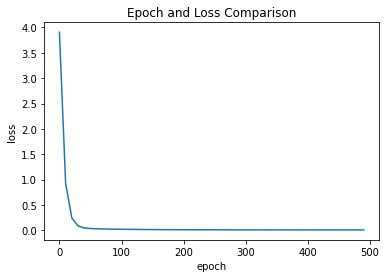

In [17]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list, loss_list)
plt.title("Epoch and Loss Comparison")

In [33]:
def predict(yıl, motor, güc, km, yakıt, w, b):
    #paket = paket_d(paket)
    #vites = vites_d(vites)
    new_yıl = yıl/np.max(bmw_df["yıl"])
    new_motor = motor/np.max(bmw_df["motor"])
    new_güc = güc/np.max(bmw_df["güc"])
    new_km = km/np.max(bmw_df["km"])
    new_yakıt = yakıt_d(yakıt)

    scaled_price = w[0]*new_yıl + w[1]*new_motor + w[2]*new_güc + w[3]*new_km + w[4]*new_yakıt + b
    predicted_price = scaled_price*np.max(bmw_df["fiyat"])

    print(f"predicted price: {predicted_price}")

In [34]:
print("first prediction =")
predict(2014, 1.6, 170, 124, "benzin", w, b) # predicted price: 0.6919062479926922

first prediction =
predicted price: 1404.786177703017


In [45]:
def new_predict(yıl,motor,güc,km,yakıt,w,b):
    scaled_x = px.transform([[yıl,motor,güc,km,yakıt]])[0] # px = sklearn.preprocessing.MinMaxScaler()
    scaled_price = scaled_x[0]*w[0] + scaled_x[1]*w[1] + scaled_x[2]*w[2] + scaled_x[3]*w[3] + scaled_x[4]*w[4] + b
    return py.inverse_transform([[scaled_price]])[0][0]

In [48]:
print("second prediction =")
new_predict(2020,1.6,170,13, 1, w, b)

second prediction =


C:\Users\Z510\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


612.491983579074